In [1]:
import pandas as pd
import torch as t

from master_thesis.core.utils.reproducibility import seed_everything
from master_thesis.core.separability.calinski_harabasz_index import (
    CalinskiHarabaszIndex,
)

DEVICE = "cuda"
PROMPT_TYPE = "few_shot"
POSITIVE_TOKEN = "true"
NEGATIVE_TOKEN = "false"
MODEL = "LLAMA_2_7B_CHAT"

DATA_DIR = "../../../../data"
DATASETS_DIR = f"{DATA_DIR}/datasets/base_experiments/cebab/train"

In [2]:
seed_everything()

### Label aspect

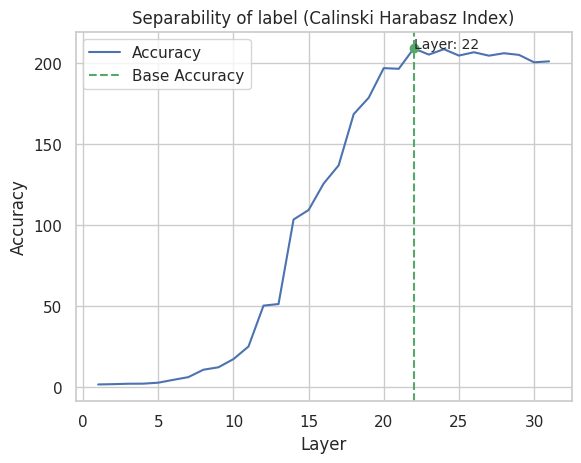

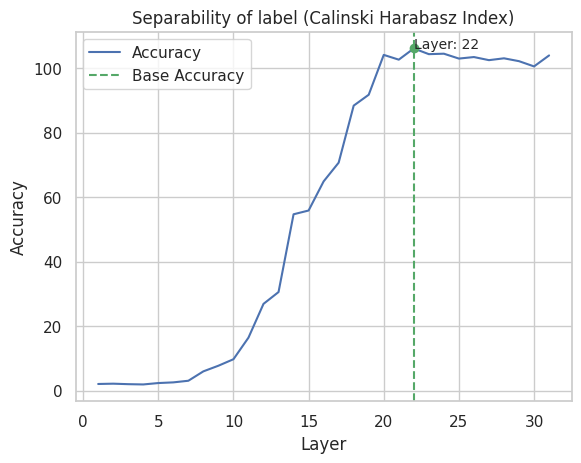

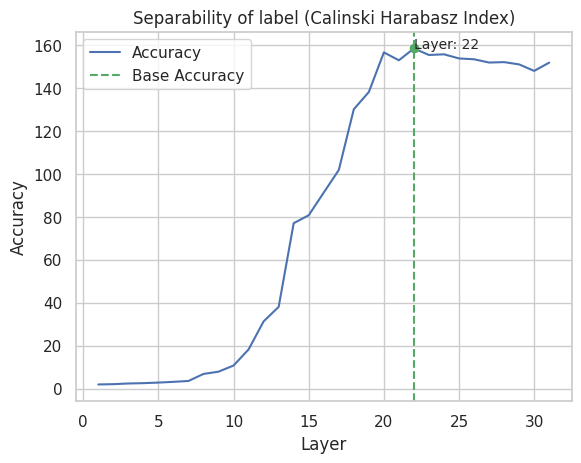

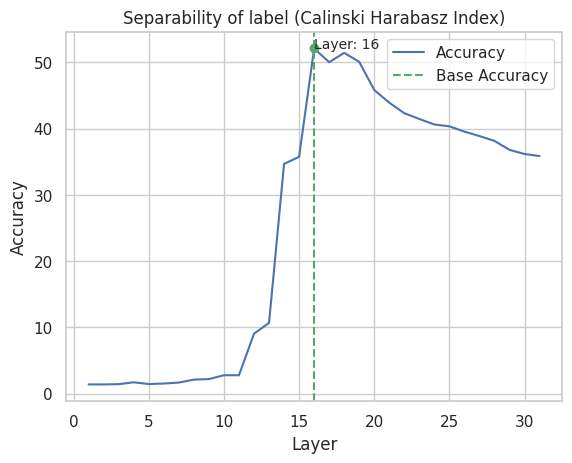

In [4]:
for aspect in ["food", "ambiance", "service", "noise"]:
    activations_dir = f"{DATA_DIR}/activations/{MODEL}/base_experiments/cebab/train/few_shot_{aspect}_aspect"
    aspect_df = pd.read_csv(f"{DATASETS_DIR}/{aspect}_aspect.csv")

    linear_model_separability = CalinskiHarabaszIndex(
        activations_dir=activations_dir,
        dataset=aspect_df,
        aspect="label",
        layers=range(1, 32),
    )

    linear_model_separability.plot_separability_score(
        show=True, save_path=f".cache/calinski_harabasz/{aspect}_aspect.png"
    )